<a href="https://colab.research.google.com/github/erick9328/Notebook-PowerBI_SSO_Telecomunicaciones/blob/main/Integraci%C3%B3n_Notebook_Colab_%2B_Power_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración Notebook Colab + Power BI

# Integración Notebook Colab + Power BI
### Análisis y visualización automática de seguridad ocupacional en telecomunicaciones

---

#### **Objetivo**
Demostrar cómo integrar el procesamiento y análisis avanzado de datos en Python (usando Google Colab) con la visualización y generación automática de dashboards en Power BI, todo dentro de un mismo flujo de trabajo moderno y reproducible.

Este notebook utiliza un caso con datos de prueba generados con IA, para seguridad ocupacional en el sector telecomunicaciones para mostrar cómo:
- Automatizar la limpieza y enriquecimiento de datos con Python.
- Realizar análisis exploratorio y validación de calidad.
- Exportar y visualizar datos limpios en Power BI, **directamente desde el notebook** mediante widgets interactivos.
- Facilitar el análisis ágil y la toma de decisiones basada en datos, sin depender de procesos manuales.

---

#### **¿Por qué es útil este enfoque?**
- Permite a equipos de análisis, BI y operaciones trabajar colaborativamente en entornos en la nube.
- Elimina pasos intermedios y errores al mover datos entre herramientas.
- Refuerza la reproducibilidad y transparencia en el flujo de datos.




## Instalación de paquetes en Colab

In [ ]:
!pip install powerbiclient

## Importaación de Libererias

In [ ]:
#from google.colab import output
#output.enable_custom_widget_manager()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from powerbiclient import QuickVisualize, get_dataset_config, Report

## Cargando el CSV directamente desde GitHub

In [ ]:
url = "https://raw.githubusercontent.com/erick9328/Notebook-PowerBI_SSO_Telecomunicaciones/main/reportes_seguridad_telecom.csv"
df = pd.read_csv(url, encoding="utf-8")
df.head()

,id,fecha,nombre_empleado,area,actividad_realizada,tipo_incidente,descripcion_incidente,epp_casco,epp_guantes,epp_chaleco,herramientas_estado,altura_trabajo,dias_incapacidad,costo_estimado,foto_incidente
0,1,2025-03-08,Noé Vega,Mantenimiento,Inspección,Sin incidente,Ronda de verificación,En buen estado,No usa,En buen estado,Dañadas,No,0,0,foto_1.jpg
1,2,2025-04-24,Bruno Morillo-Olmedo,Soporte,Inspección,Atrapamiento,Reporte rutinario,En buen estado,No usa,En buen estado,En buen estado,No,1,881,foto_2.jpg
2,3,2025-06-01,Ruperta Reina Torrens,Supervisión,Cambio de ONT,Caída,Resbalón en terreno mojado,En buen estado,No usa,En buen estado,En buen estado,No,5,765,foto_3.jpg
3,4,2025-02-19,Adolfo Catalán Múgica,Supervisión,Tendido de fibra,Sin incidente,Reporte rutinario,No usa,En buen estado,En buen estado,Dañadas,No,0,0,foto_4.jpg
4,5,2025-03-24,Cruz Canet Ocaña,Mantenimiento,Cambio de ONT,Sin incidente,Ronda de verificación,En buen estado,Dañado,En buen estado,En buen estado,No,0,0,foto_5.jpg


## Análsis Exploratorio

In [ ]:
# Cantidad de registros y columnas
print("(filas, columnas):", df.shape)
# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

(filas, columnas): (2000, 15)

Tipos de datos:
id                        int64
fecha                    object
nombre_empleado          object
area                     object
actividad_realizada      object
tipo_incidente           object
descripcion_incidente    object
epp_casco                object
epp_guantes              object
epp_chaleco              object
herramientas_estado      object
altura_trabajo           object
dias_incapacidad          int64
costo_estimado            int64
foto_incidente           object
dtype: object


In [ ]:
 # Resumen estadístico (solo columnas numéricas)
 df.describe()

,id,dias_incapacidad,costo_estimado
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,1.235500,381.863500
std,577.494589,1.374039,405.161329
min,1.000000,0.000000,0.000000
25%,500.750000,0.000000,0.000000
50%,1000.500000,1.000000,237.500000
75%,1500.250000,2.000000,754.250000
max,2000.000000,7.000000,1199.000000


In [ ]:
# Valores nulos por columna
df.isnull().sum()

,0
id,0
fecha,0
nombre_empleado,0
area,0
actividad_realizada,0
tipo_incidente,0
descripcion_incidente,0
epp_casco,0
epp_guantes,0
epp_chaleco,0


In [ ]:
# categorías por columna relevante
for col in ['area', 'actividad_realizada', 'tipo_incidente', 'epp_casco', 'epp_guantes', 'epp_chaleco', 'herramientas_estado', 'altura_trabajo']:
    print(f"\nValores únicos en '{col}':")
    print(df[col].value_counts())


Valores únicos en 'area':
area
Supervisión      528
Instalaciones    495
Soporte          493
Mantenimiento    484
Name: count, dtype: int64

Valores únicos en 'actividad_realizada':
actividad_realizada
Cambio de ONT               326
Configuración de equipos    295
Inspección                  290
Tendido de fibra            287
Verificación de señal       275
Reparación                  271
Instalación ONT             256
Name: count, dtype: int64

Valores únicos en 'tipo_incidente':
tipo_incidente
Sin incidente          798
Caída                  319
Golpe                  288
Corte                  184
Descarga eléctrica     177
Atrapamiento           129
Exposición a altura    105
Name: count, dtype: int64

Valores únicos en 'epp_casco':
epp_casco
En buen estado    1420
Dañado             314
No usa             266
Name: count, dtype: int64

Valores únicos en 'epp_guantes':
epp_guantes
En buen estado    1225
Dañado             392
No usa             383
Name: count, dtype: int64



## Limpieza y enriquecimiento de los datos

In [ ]:
# Cambiando dato fecha de texto a formato tiempo
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
for col in ['tipo_incidente', 'epp_casco', 'epp_guantes', 'epp_chaleco', 'herramientas_estado', 'area', 'actividad_realizada']:
    df[col] = df[col].astype(str).str.title().str.strip()

## Calculando riesgos
def calcula_riesgo(row):
    score = 0
    if row['altura_trabajo'] == 'Sí':
        if row['epp_casco'] in ['No Usa', 'Dañado']:
            score += 1
        if row['herramientas_estado'] in ['Dañadas', 'No Inspeccionadas']:
            score += 1
    if row['tipo_incidente'] != 'Sin Incidente':
        for col in ['epp_casco', 'epp_guantes', 'epp_chaleco']:
            if row[col] in ['No Usa', 'Dañado']:
                score += 1
    if score >= 3:
        return 'Alto'
    elif score == 2:
        return 'Medio'
    else:
        return 'Bajo'

df['riesgo_estimado'] = df.apply(calcula_riesgo, axis=1)
df = df.drop_duplicates()  # eliminando duplicados
df = df.drop(['foto_incidente', 'id'], axis=1) # eliminando columnas innecesarias
df = df.dropna(subset=['nombre_empleado', 'fecha', 'area', 'actividad_realizada']) # Elimina filas que contengas valores Nan o vacios


In [ ]:
df.head()

,fecha,nombre_empleado,area,actividad_realizada,tipo_incidente,descripcion_incidente,epp_casco,epp_guantes,epp_chaleco,herramientas_estado,altura_trabajo,dias_incapacidad,costo_estimado,riesgo_estimado
0,2025-03-08,Noé Vega,Mantenimiento,Inspección,Sin Incidente,Ronda de verificación,En Buen Estado,No Usa,En Buen Estado,Dañadas,No,0,0,Bajo
1,2025-04-24,Bruno Morillo-Olmedo,Soporte,Inspección,Atrapamiento,Reporte rutinario,En Buen Estado,No Usa,En Buen Estado,En Buen Estado,No,1,881,Bajo
2,2025-06-01,Ruperta Reina Torrens,Supervisión,Cambio De Ont,Caída,Resbalón en terreno mojado,En Buen Estado,No Usa,En Buen Estado,En Buen Estado,No,5,765,Bajo
3,2025-02-19,Adolfo Catalán Múgica,Supervisión,Tendido De Fibra,Sin Incidente,Reporte rutinario,No Usa,En Buen Estado,En Buen Estado,Dañadas,No,0,0,Bajo
4,2025-03-24,Cruz Canet Ocaña,Mantenimiento,Cambio De Ont,Sin Incidente,Ronda de verificación,En Buen Estado,Dañado,En Buen Estado,En Buen Estado,No,0,0,Bajo


## Conexion con Power BI

In [ ]:
# En este paso al momento de correr nos van a enviar un código de autenticación el cual debemos pegarlo en https://microsoft.com/devicelogin.
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code AS924KG6J to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


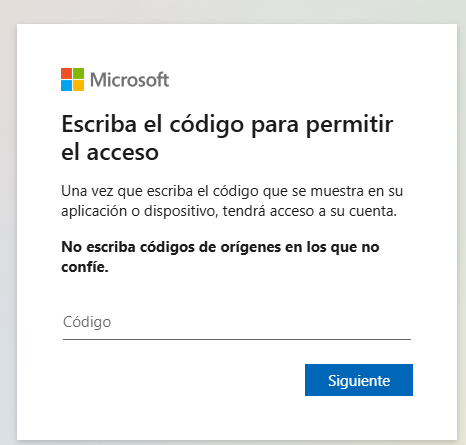

## Creación de reporte y visualización a partir de nuestro df

In [ ]:
PowerBI_SSO_Telecomunicaciones = QuickVisualize(get_dataset_config(df), auth=device_auth)
# Renderizar el nuevo informe
PowerBI_SSO_Telecomunicaciones

QuickVisualize()

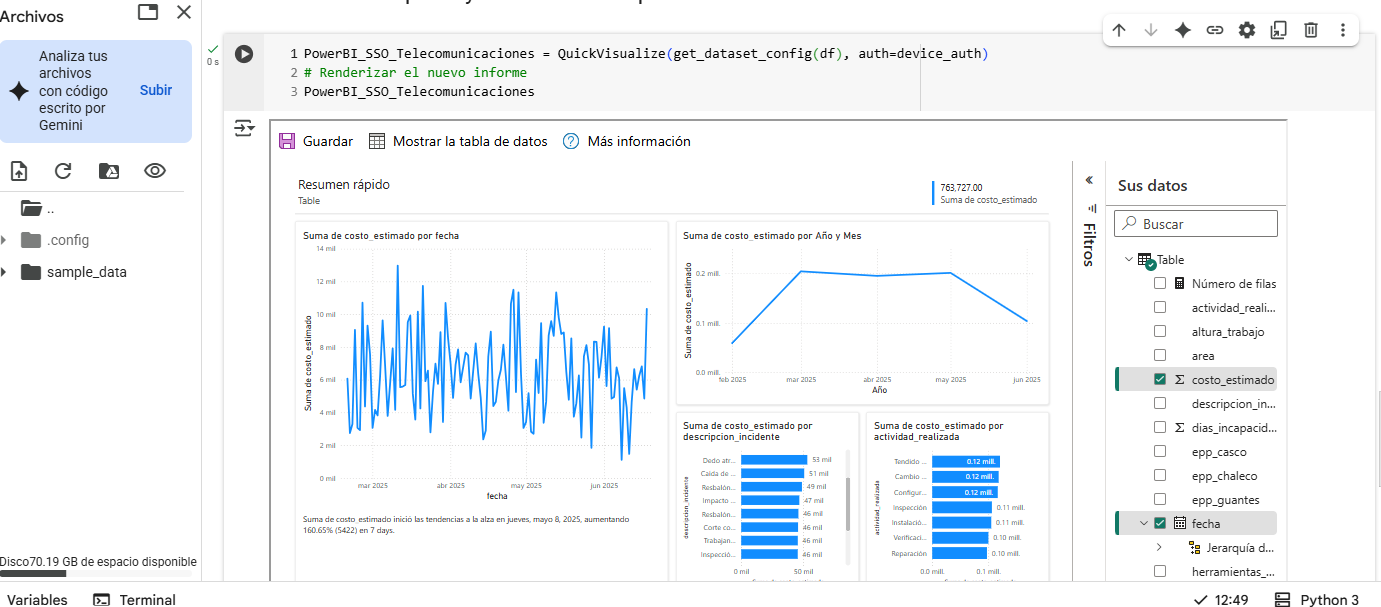